In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import gc
import glob

# Í∑∏ÎûòÌîÑ Í∏∞Î≥∏ ÌÖåÎßà ÏÑ§Ï†ï
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# Í∑∏ÎûòÌîÑ Í∏∞Î≥∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False


# Î≥µÏû°Ìïú ÌÜµÍ≥Ñ Ï≤òÎ¶¨Î•º ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨
from scipy import stats

In [2]:
# data_type = "train"
# month = "07"
# category = "ÏûîÏï°Ï†ïÎ≥¥"

# local
root_path = '../../data'

# colab
# root_path = '/content/drive/MyDrive/12·Ñå·Ö© ·Ñë·Ö°·Ñã·Öµ·ÑÇ·Ö•·ÜØ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/data'

#drive_folder = f'{root_path}/Ïä§ÌÉØÌã∞Ï¶à_Raw_data/'

In [445]:
df1 = pd.read_csv(f'{root_path}/Ìà¨Ïàò_Îç∞Ïù¥ÌÑ∞_ÏµúÏ¢Ö.csv', encoding='utf-8')

- FA 1ÎÖÑÏ∞® Ï†úÏô∏ -> FA 1ÎÖÑÏ∞®Îäî FA ÎêòÍ≥† ÎÇú ÌõÑ Ïä§ÌÖüÎì§, Í∑∏ Ï†Ñ ÎÖÑÎì§ Ïä§ÌÖüÏúºÎ°ú ÏÇ¥Ìé¥Î¥êÏïºÌï®
- Ìï¥Ïô∏Ïùò Í∏∞Î°ù Ï†úÏô∏Ìï®

---

In [449]:
# 1. Î≥µÏÇ¨
df_filtered = df1.copy()

In [451]:
# 2. 'nÏ∞®' Ïª¨Îüº ÏÉùÏÑ±: ÏÑ†ÏàòÎ™ÖÏóê (2Ï∞®) Ìè¨Ìï® + 'FA 1ÎÖÑÏ∞®' Ï°∞Í±¥
df_filtered['nÏ∞®'] = 0
mask = df_filtered['ÏÑ†ÏàòÎ™Ö'].str.contains(r'\(2Ï∞®\)') & (df_filtered['Íµ¨Î∂Ñ'] == 'FA 1ÎÖÑÏ∞®')
df_filtered.loc[mask, 'nÏ∞®'] = 1

In [453]:
# 3. Ï†úÍ±∞Ìï† ÏÑ†ÏàòÎ™Ö Î™ÖÏãúÏ†ÅÏúºÎ°ú Ï†úÍ±∞
Ï†úÏô∏ÏÑ†Ïàò = [
    'Î∞ïÏ†ïÏßÑ(2Ï∞®)', 'ÏÜêÏäπÎùΩ(2Ï∞®)', 'Ïò§ÏäπÌôò(1Ï∞®)', 
    'ÍπÄÍ¥ëÌòÑ(2Ï∞®)', 'Î•òÌòÑÏßÑ', 'Í∞ïÏú§Íµ¨(1Ï∞®)', 'ÍπÄÍ¥ëÌòÑ(3Ï∞®)'
]
df_filtered = df_filtered[~df_filtered['ÏÑ†ÏàòÎ™Ö'].isin(Ï†úÏô∏ÏÑ†Ïàò)]

In [455]:
# 4. FA 1ÎÖÑÏ∞® Ï§ë (2Ï∞®) ÏïÑÎãå Í≤ΩÏö∞ Ï†úÍ±∞
df_filtered = df_filtered[~((df_filtered['Íµ¨Î∂Ñ'] == 'FA 1ÎÖÑÏ∞®') & (df_filtered['nÏ∞®'] == 0))]

In [457]:
# 5. Ìï¥Ïô∏Í≥ÑÏïΩÏûê Ï†úÏô∏
df_cleaned = df_filtered[
    (~df_filtered['Íµ¨Î∂Ñ'].str.contains('Ìï¥Ïô∏'))
].copy()

In [459]:
# 2. ÌèâÍ∑† ÎÇº Ïä§ÌÉØ Ïª¨Îüº
stat_cols = ['Ï¢ÖÌï© WAR', 'ERA', 'Ïù¥ÎãùÏàò', 'ÌÉàÏÇºÏßÑ', 'Î≥ºÎÑ∑ÌóàÏö©', 'FIP', 'Ìà¨Íµ¨Ïàò', 'ÌîºÏû•ÌÉÄÏú®', 'ÏÇ¨ÏÇ¨Íµ¨', 'ÏõêÌÅ¥ÎüΩÎß®Ïó¨Î∂Ä','WHIP', 'ÎÇòÏù¥', 'ÌôÄÎìú', 'ÏÑ∏Ïù¥Î∏å', 'Î∏îÎ°†ÏÑ∏Ïù¥Î∏å', 'Î∏îÎ°†ÌôÄÎìú', 'Íµ¨Ïõê Ïù¥Îãù']

In [461]:
# 2-1. Ìï©Í≥Ñ ÎÇº Ïä§ÌÉØ Ïª¨Îüº
stat_sum = df_cleaned.groupby('ÏÑ†ÏàòÎ™Ö').agg({
    'Ïù¥ÎãùÏàò': 'sum',
    'ÌÉàÏÇºÏßÑ': 'sum',
    'ÏÇ¨ÏÇ¨Íµ¨': 'sum',
    'ÏûêÏ±ÖÏ†ê': 'sum'  # ERA* Í≥ÑÏÇ∞Ïóê ÌïÑÏöî
}).reset_index()

In [463]:
# ÌååÏÉù Ïª¨Îüº Í≥ÑÏÇ∞
stat_sum['ERA*'] = (stat_sum['ÏûêÏ±ÖÏ†ê'] / stat_sum['Ïù¥ÎãùÏàò']) * 9
stat_sum['K/9'] = (stat_sum['ÌÉàÏÇºÏßÑ']  / stat_sum['Ïù¥ÎãùÏàò']) * 9
stat_sum['BB/9'] = (stat_sum['ÏÇ¨ÏÇ¨Íµ¨'] / stat_sum['Ïù¥ÎãùÏàò']) * 9

In [465]:
# 3. ÏÑ†ÏàòÎ≥Ñ ÌèâÍ∑† Ïä§ÌÉØ Í≥ÑÏÇ∞
stat_mean = df_cleaned.groupby('ÏÑ†ÏàòÎ™Ö')[stat_cols].mean().reset_index()
stat_mean.columns = ['ÏÑ†ÏàòÎ™Ö'] + [f'ÌèâÍ∑†_{col}' for col in stat_cols]

In [467]:
# 4-A. 'Ìà¨' Ïª¨Îüº Ï†ÑÏ≤òÎ¶¨: Ïö∞ ‚Üí Ïö∞Ìà¨, Ï¢å ‚Üí Ï¢åÌà¨
df_cleaned['Ìà¨'] = df_cleaned['Ìà¨'].apply(
    lambda x: 'Ïö∞Ìà¨' if 'Ïö∞' in str(x) else ('Ï¢åÌà¨' if 'Ï¢å' in str(x) else x)
)

In [469]:
# 4. ÏÑ†ÏàòÎ≥Ñ Ìè¨ÏßÄÏÖò Ï†ïÎ≥¥ Ï∂îÍ∞Ä (ÎåÄÌëúÍ∞í Ï∂îÏ∂ú)
pos_info = df_cleaned.groupby('ÏÑ†ÏàòÎ™Ö')[['Ìà¨', 'ÏÑ∏Î∂Ä Ìè¨ÏßÄÏÖò']].agg(lambda x: x.mode().iloc[0]).reset_index()

In [471]:
# 5. Í≥ÑÏïΩ Ï¥ùÏï° + Í≥ÑÏïΩ Ïó∞Ïàò Ï†ïÎ≥¥
fa_contract = df1[df1['FA Í≥ÑÏïΩ Ïó∞Ïàò'] > 0][['ÏÑ†ÏàòÎ™Ö', 'FA Í≥ÑÏïΩ Ï¥ùÏï°', 'FA Í≥ÑÏïΩ Ïó∞Ïàò']].drop_duplicates('ÏÑ†ÏàòÎ™Ö')
fa_contract['Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°'] = fa_contract['FA Í≥ÑÏïΩ Ï¥ùÏï°'] / fa_contract['FA Í≥ÑÏïΩ Ïó∞Ïàò']

In [473]:
# === ÏµúÏ¢Ö Î≥ëÌï© (ÌèâÍ∑† + Ìï©Í≥Ñ ÌååÏÉùÏª¨Îüº + Ìè¨ÏßÄÏÖò + Í≥ÑÏïΩ Ï†ïÎ≥¥) ===
merged = stat_mean.merge(stat_sum[['ÏÑ†ÏàòÎ™Ö', 'ERA*', 'K/9', 'BB/9']], on='ÏÑ†ÏàòÎ™Ö') \
                  .merge(pos_info, on='ÏÑ†ÏàòÎ™Ö') \
                  .merge(fa_contract, on='ÏÑ†ÏàòÎ™Ö')

In [475]:
# 7. ÏõêÌï´ Ïù∏ÏΩîÎî©
df_encoded = pd.get_dummies(merged, columns=['Ìà¨', 'ÏÑ∏Î∂Ä Ìè¨ÏßÄÏÖò'])

In [477]:
# 8. ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù ÎåÄÏÉÅ Ïª¨Îüº ÏÑ†ÌÉù
columns_for_corr = [col for col in df_encoded.columns if col.startswith('ÌèâÍ∑†_') or col.startswith('Ìà¨_') or col.startswith('ÏÑ∏Î∂Ä Ìè¨ÏßÄÏÖò_')]
columns_for_corr.append('Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°')

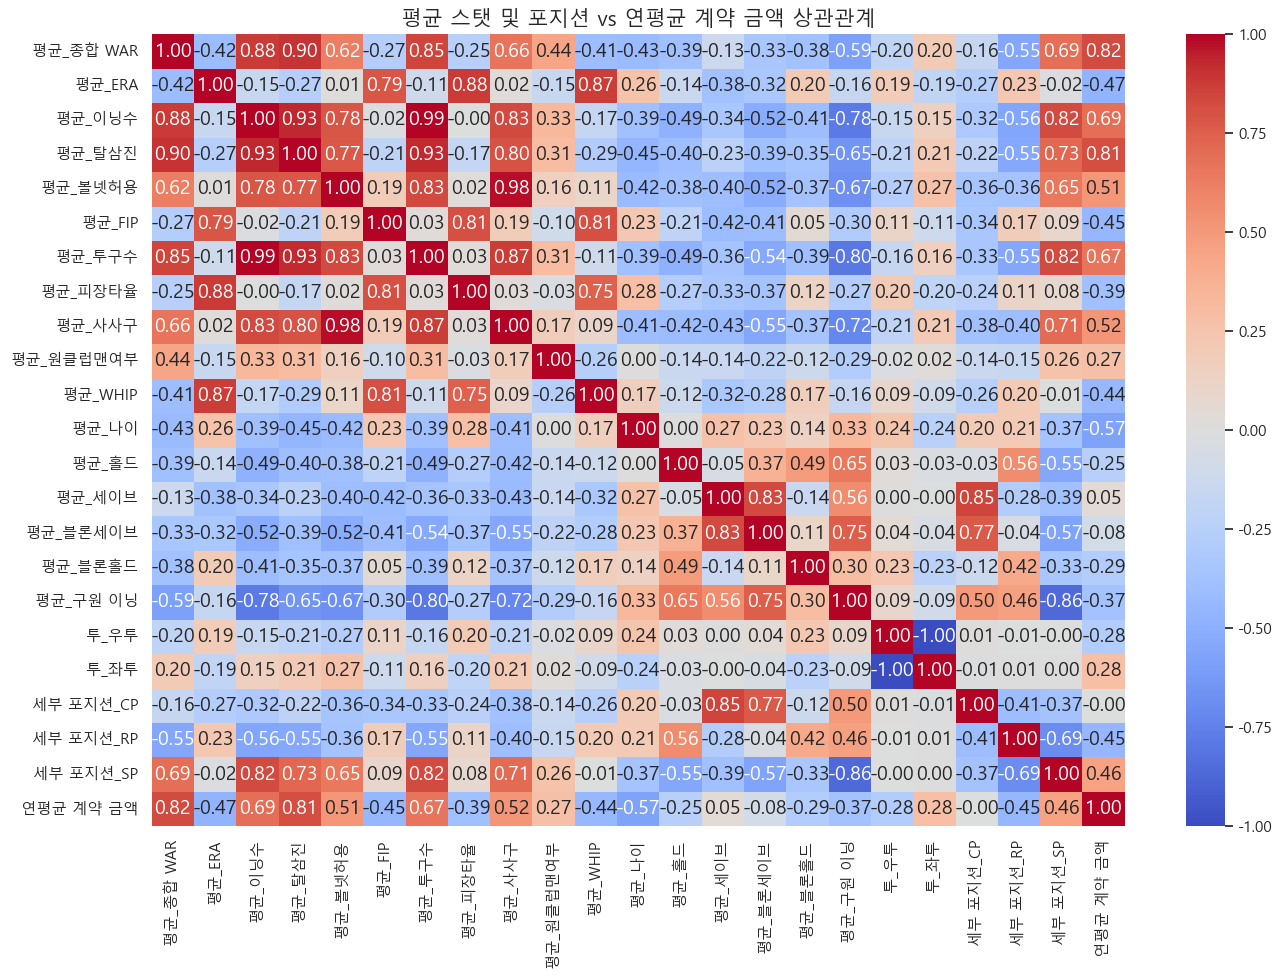

In [479]:
# 9. ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù Î∞è ÏãúÍ∞ÅÌôî (Ï†ÑÏ≤¥ ÏÑ†Ïàò)
corr_df = df_encoded[columns_for_corr].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("ÌèâÍ∑† Ïä§ÌÉØ Î∞è Ìè¨ÏßÄÏÖò vs Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï° ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ", fontsize=15)
plt.tight_layout()
plt.show()

In [401]:
# Íµ¨ÏõêÌà¨ÏàòÎßå ÌïÑÌÑ∞ÎßÅ
df_reliever = df_encoded[df_encoded['ÌèâÍ∑†_Íµ¨Ïõê Ïù¥Îãù'] > 28]

In [403]:
# columns_for_corrÏóê ÏûàÎäî Ïª¨ÎüºÏù¥ Î™®Îëê Ï°¥Ïû¨ÌïòÎèÑÎ°ù Î≥¥Ï†ï
for col in columns_for_corr:
    if col not in df_reliever.columns:
        df_reliever[col] = 0

In [405]:
# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù
corr_df = df_reliever[columns_for_corr].corr()

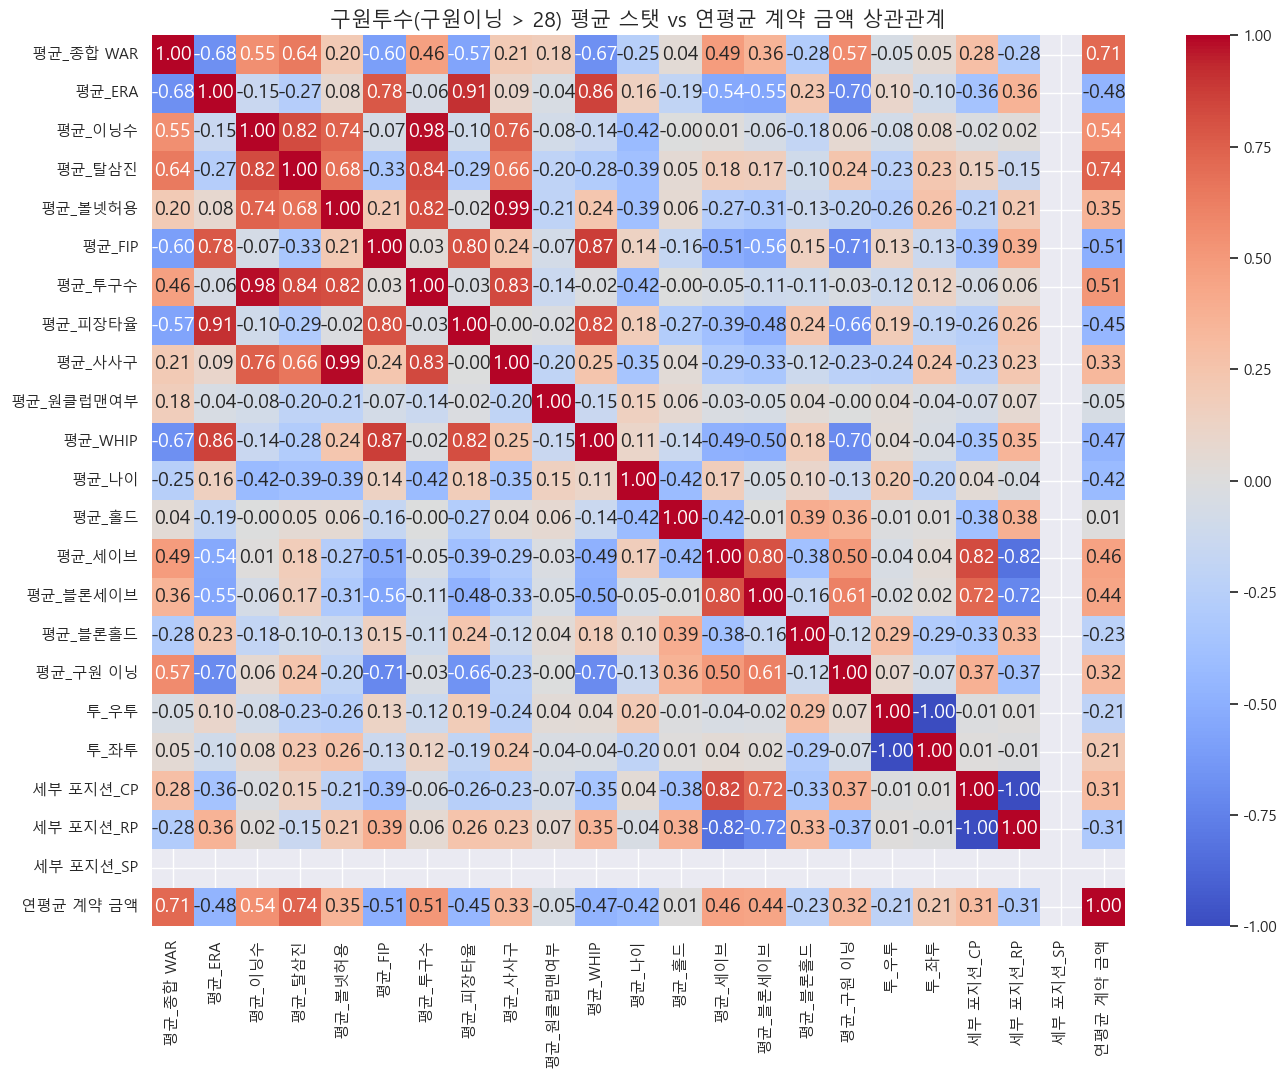

In [407]:
# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 11))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Íµ¨ÏõêÌà¨Ïàò(Íµ¨ÏõêÏù¥Îãù > 28) ÌèâÍ∑† Ïä§ÌÉØ vs Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï° ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ", fontsize=15)
plt.tight_layout()
plt.show()

---

## Ïä§ÌÖüÎì§ vs FA_Ïó∞ÌèâÍ∑†Í≥ÑÏïΩÍ∏à  (FA Í≥ÑÏïΩ Ï¥ùÏï° / FA Í≥ÑÏïΩ Ïó∞Ïàò)

- Ìï®Ïàò ÏÇ¨Ïö©

In [24]:
# ÏÇ∞Ï†êÎèÑ
def scatter_with_size(df, x_col, y_col='Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°'):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=df,
        x=x_col,
        y=y_col,
        size=x_col,
        hue=x_col,
        palette='summer',
        sizes=(30, 200)
    )
    plt.title(f'{x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [25]:
# ÎßâÎåÄÍ∑∏ÎûòÌîÑ
def binned_barplot_custom(df, x_col, y_col='Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°', bins=None, labels=None):
    df = df.copy()

    if bins is None or labels is None:
        raise ValueError("binsÏôÄ labelsÎäî Î∞òÎìúÏãú ÏßÄÏ†ïÌï¥Ïïº Ìï©ÎãàÎã§.")
    
    df['Íµ¨Í∞Ñ'] = pd.cut(df[x_col], bins=bins, labels=labels, right=False)

    grouped = df.groupby('Íµ¨Í∞Ñ', observed=False)[y_col].mean().reset_index()

    plt.figure(figsize=(10, 6))
    sns.barplot(data=grouped, x='Íµ¨Í∞Ñ', y=y_col, hue='Íµ¨Í∞Ñ', palette='summer')
    plt.title(f'{x_col} Íµ¨Í∞ÑÎ≥Ñ {y_col} ÌèâÍ∑†')
    plt.xlabel(f'{x_col} Íµ¨Í∞Ñ')
    plt.ylabel(f'{y_col} (Ïõê)')
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

---

### 1. Ïù¥ÎãùÏàò vs FA_Ïó∞ÌèâÍ∑†Í≥ÑÏïΩÍ∏à (ÏÑ†Î∞úÏù¥Î©¥ Ïù¥ÎãùÏàòÍ∞Ä ÎßéÏßÄ ÏïäÎÇò ..?)

- ÏÇ∞Ï†êÎèÑ

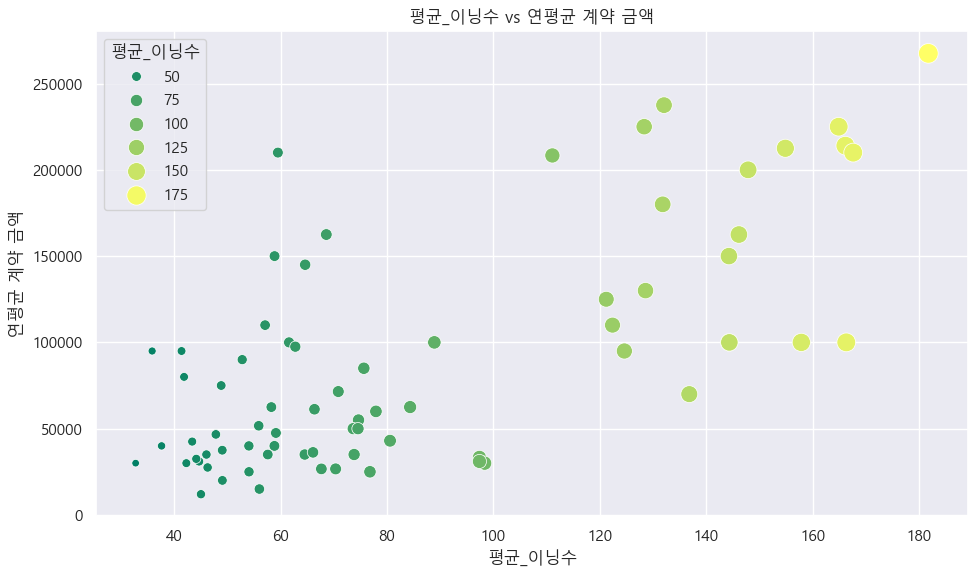

In [29]:
scatter_with_size(merged, 'ÌèâÍ∑†_Ïù¥ÎãùÏàò')

- ÎßâÎåÄ

In [31]:
merged['ÌèâÍ∑†_Ïù¥ÎãùÏàò'].min()

32.775

In [32]:
merged['ÌèâÍ∑†_Ïù¥ÎãùÏàò'].max()

181.71999999999997

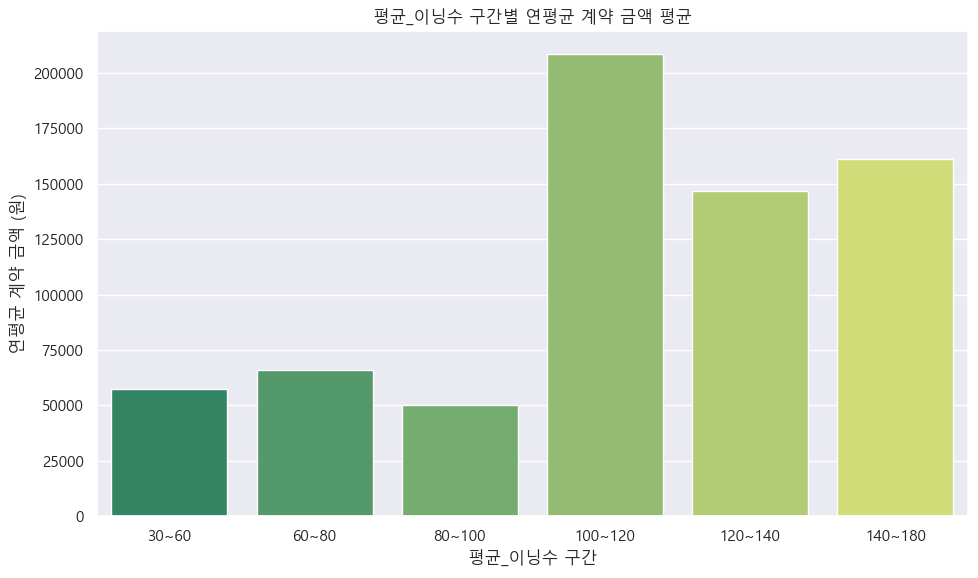

In [33]:
binned_barplot_custom(
    merged,
    x_col='ÌèâÍ∑†_Ïù¥ÎãùÏàò',
    bins=[30, 60, 80, 100, 120, 140, 180],
    labels=['30~60', '60~80', '80~100', '100~120', '120~140', '140~180']
)

In [34]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
correlation = merged[['ÌèâÍ∑†_Ïù¥ÎãùÏàò', 'Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°']].corr().iloc[0, 1]
print(f'üìå ÌèâÍ∑† Ïù¥ÎãùÏàòÏôÄ Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: {correlation:.3f}')

üìå ÌèâÍ∑† Ïù¥ÎãùÏàòÏôÄ Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.692


---

### 2. ERA vs FA_Ïó∞ÌèâÍ∑†Í≥ÑÏïΩÍ∏à

- ÏÇ∞Ï†êÎèÑ

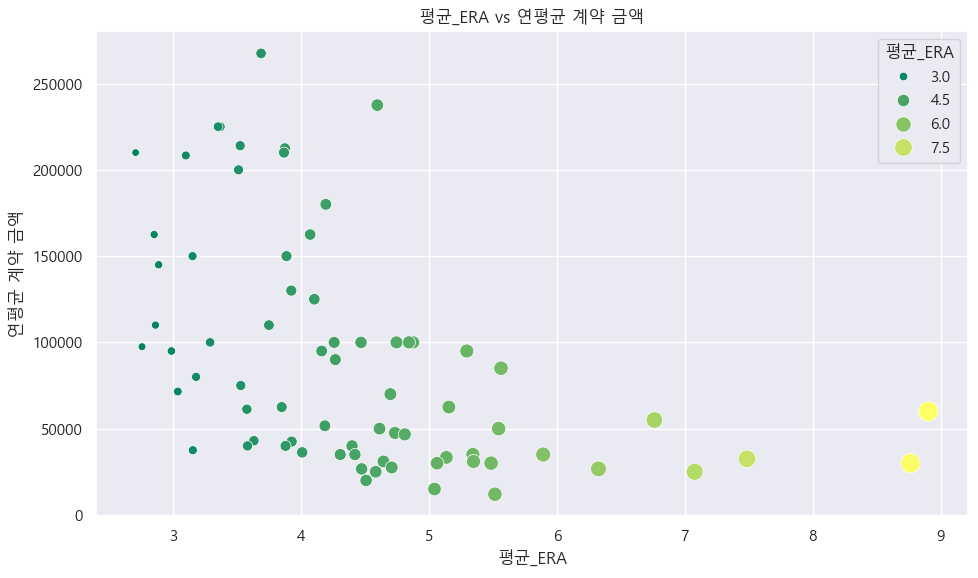

In [38]:
scatter_with_size(merged, 'ÌèâÍ∑†_ERA')

- ÎßâÎåÄ

In [40]:
merged['ÌèâÍ∑†_ERA'].min()

2.705

In [41]:
merged['ÌèâÍ∑†_ERA'].max()

8.905

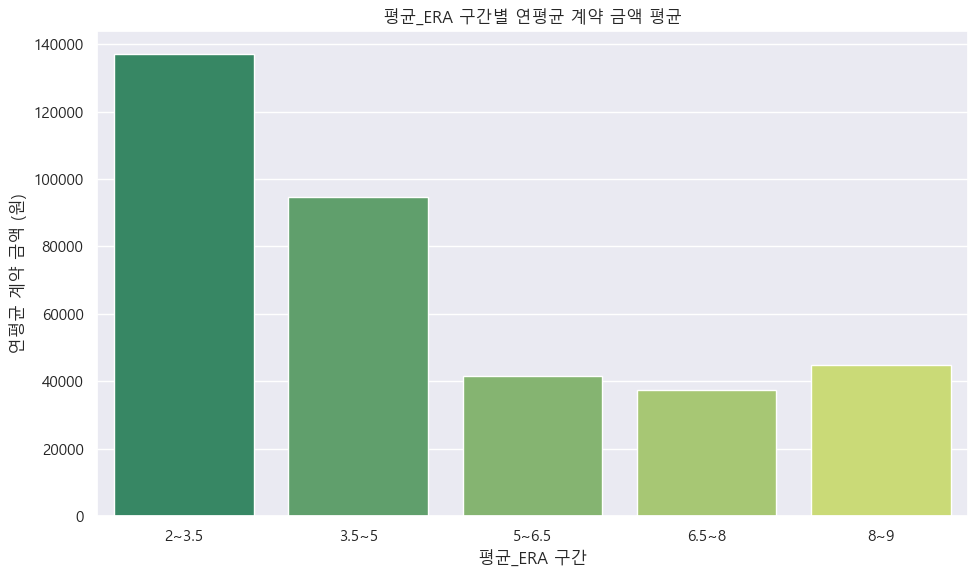

In [42]:
binned_barplot_custom(
    merged,
    x_col='ÌèâÍ∑†_ERA',
    bins = [2, 3.5, 5, 6.5, 8, 9],
    labels = ['2~3.5', '3.5~5', '5~6.5', '6.5~8', '8~9']
)

In [43]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
correlation = merged[['ÌèâÍ∑†_ERA', 'Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°']].corr().iloc[0, 1]
print(f'üìå ÌèâÍ∑† ERAÏôÄ Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: {correlation:.3f}')

üìå ÌèâÍ∑† ERAÏôÄ Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: -0.471


---

### 3. Ï¢ÖÌï© WAR vs FA_Ïó∞ÌèâÍ∑†Í≥ÑÏïΩÍ∏à

- ÏÇ∞Ï†êÎèÑ

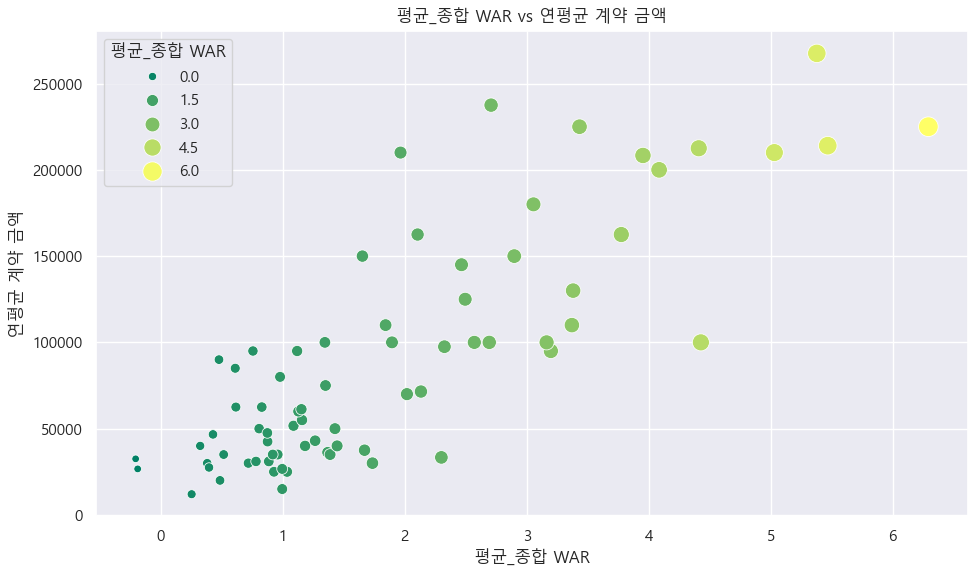

In [47]:
scatter_with_size(merged, 'ÌèâÍ∑†_Ï¢ÖÌï© WAR')

- ÎßâÎåÄ

In [49]:
merged['ÌèâÍ∑†_Ï¢ÖÌï© WAR'].min()

-0.20666666666666667

In [50]:
merged['ÌèâÍ∑†_Ï¢ÖÌï© WAR'].max()

6.2925

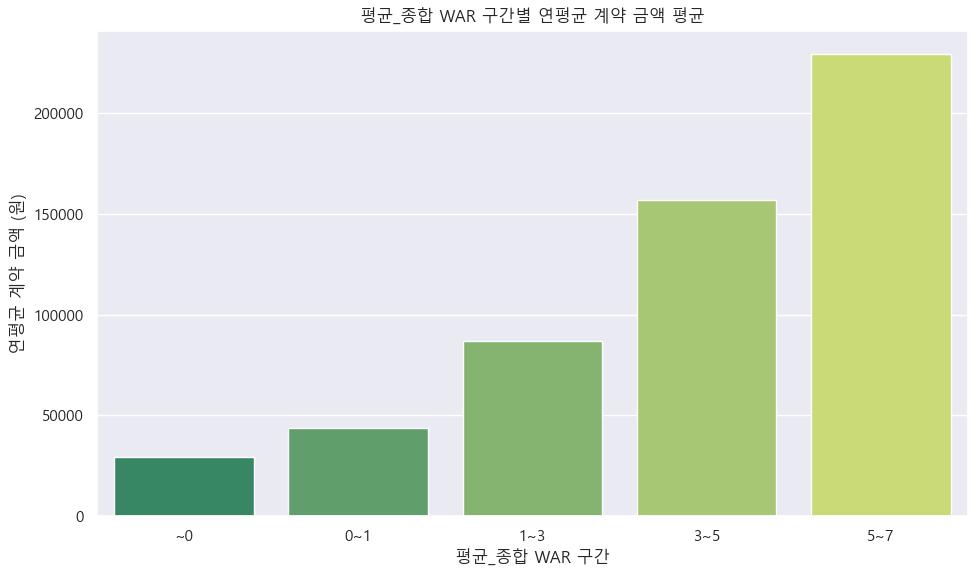

In [51]:
binned_barplot_custom(
    merged,
    x_col='ÌèâÍ∑†_Ï¢ÖÌï© WAR',
    bins = [-3, 0, 1, 3, 5, 7],
    labels = ['~0', '0~1', '1~3', '3~5', '5~7']
)

In [52]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
correlation = merged[['ÌèâÍ∑†_Ï¢ÖÌï© WAR', 'Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°']].corr().iloc[0, 1]
print(f'üìå ÌèâÍ∑† Ï¢ÖÌï© WARÍ≥º Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: {correlation:.3f}')

üìå ÌèâÍ∑† Ï¢ÖÌï© WARÍ≥º Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.824


---

### 4. ÌÉàÏÇºÏßÑ vs FA_Ïó∞ÌèâÍ∑†Í≥ÑÏïΩÍ∏à (ÌÉàÏÇºÏßÑ Í∏∞Ï§Ä Î≥ÄÍ≤Ω ÌïÑÏöîÌï†ÏßÄÎèÑ)

- ÏÇ∞Ï†êÎèÑ

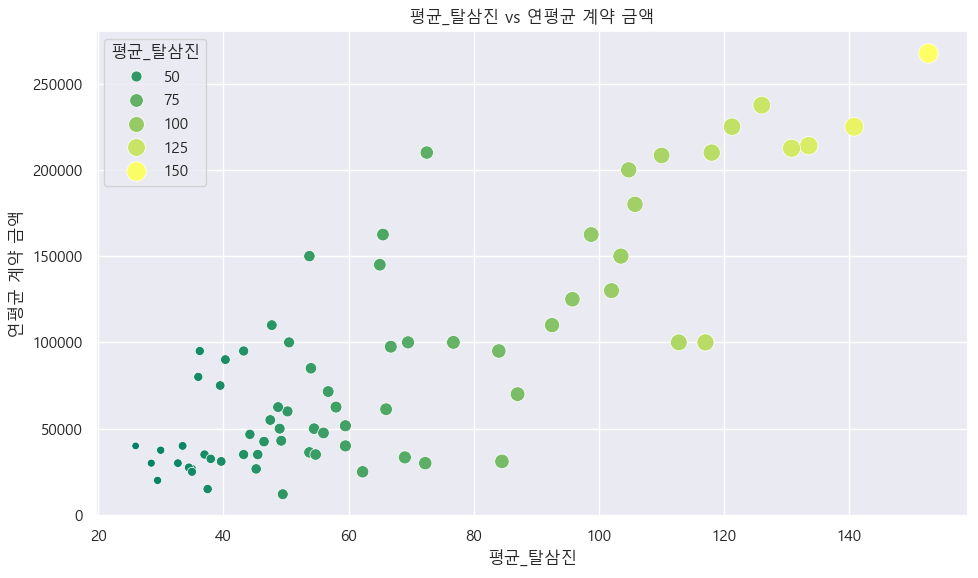

In [56]:
scatter_with_size(merged, 'ÌèâÍ∑†_ÌÉàÏÇºÏßÑ')

- ÎßâÎåÄ

In [58]:
merged['ÌèâÍ∑†_ÌÉàÏÇºÏßÑ'].min()

26.0

In [59]:
merged['ÌèâÍ∑†_ÌÉàÏÇºÏßÑ'].max()

152.6

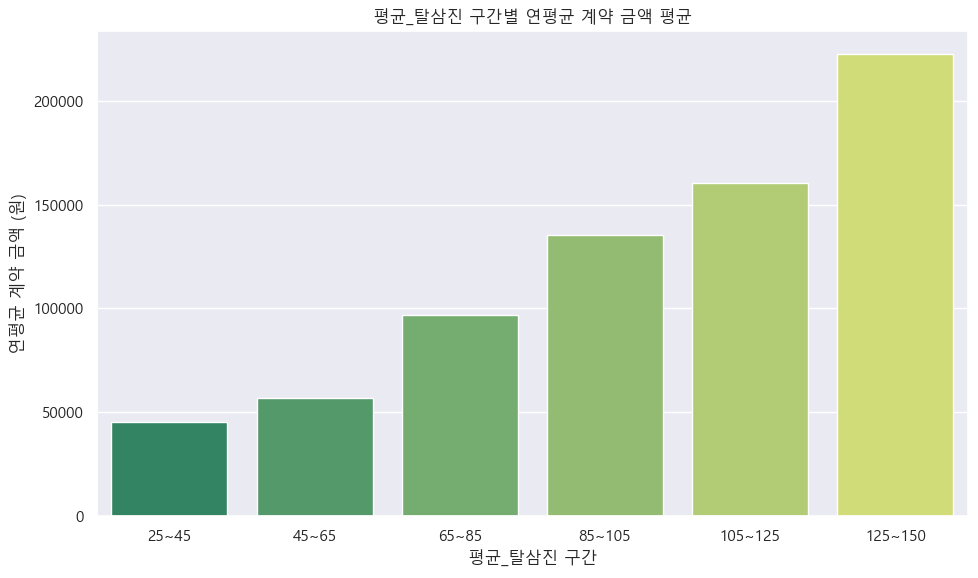

In [60]:
binned_barplot_custom(
    merged,
    x_col='ÌèâÍ∑†_ÌÉàÏÇºÏßÑ',
    bins = [25, 45, 65, 85, 105, 125, 150],
    labels = ['25~45','45~65','65~85','85~105','105~125','125~150']
)

In [61]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
correlation = merged[['ÌèâÍ∑†_ÌÉàÏÇºÏßÑ', 'Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°']].corr().iloc[0, 1]
print(f'üìå ÌèâÍ∑† ÌÉàÏÇºÏßÑÍ≥º Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: {correlation:.3f}')

üìå ÌèâÍ∑† ÌÉàÏÇºÏßÑÍ≥º Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.813


---

### 5. FIP vs FA_Ïó∞ÌèâÍ∑†Í≥ÑÏïΩÍ∏à

- ÏÇ∞Ï†êÎèÑ

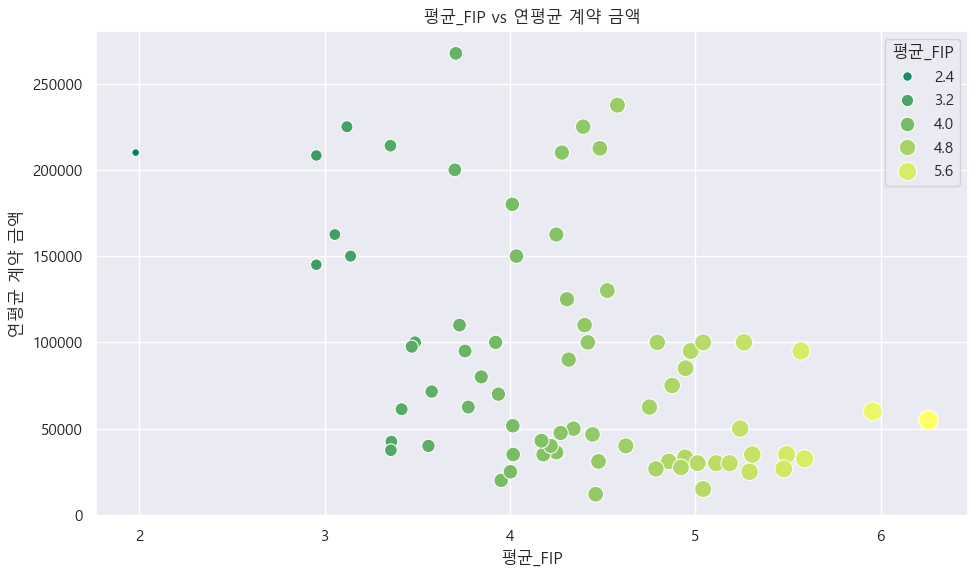

In [65]:
scatter_with_size(merged, 'ÌèâÍ∑†_FIP')

- ÎßâÎåÄ

In [67]:
merged['ÌèâÍ∑†_FIP'].min()

1.98

In [68]:
merged['ÌèâÍ∑†_FIP'].max()

6.2575

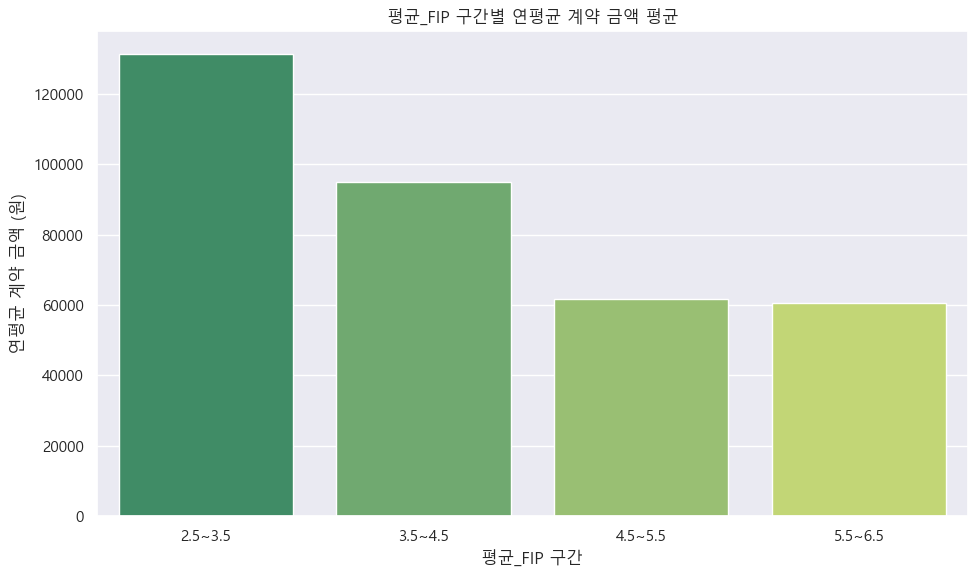

In [69]:
binned_barplot_custom(
    merged,
    x_col='ÌèâÍ∑†_FIP',
    bins = [2.5, 3.5, 4.5, 5.5, 6.5],
    labels = ['2.5~3.5','3.5~4.5','4.5~5.5','5.5~6.5']
)

In [70]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
correlation = merged[['ÌèâÍ∑†_FIP', 'Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°']].corr().iloc[0, 1]
print(f'üìå ÌèâÍ∑† FIPÏôÄ Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: {correlation:.3f}')

üìå ÌèâÍ∑† FIPÏôÄ Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: -0.452


---

### 6. ÌîºÏû•ÌÉÄÏú® vs FA_Ïó∞ÌèâÍ∑†Í≥ÑÏïΩÍ∏à

- ÏÇ∞Ï†êÎèÑ

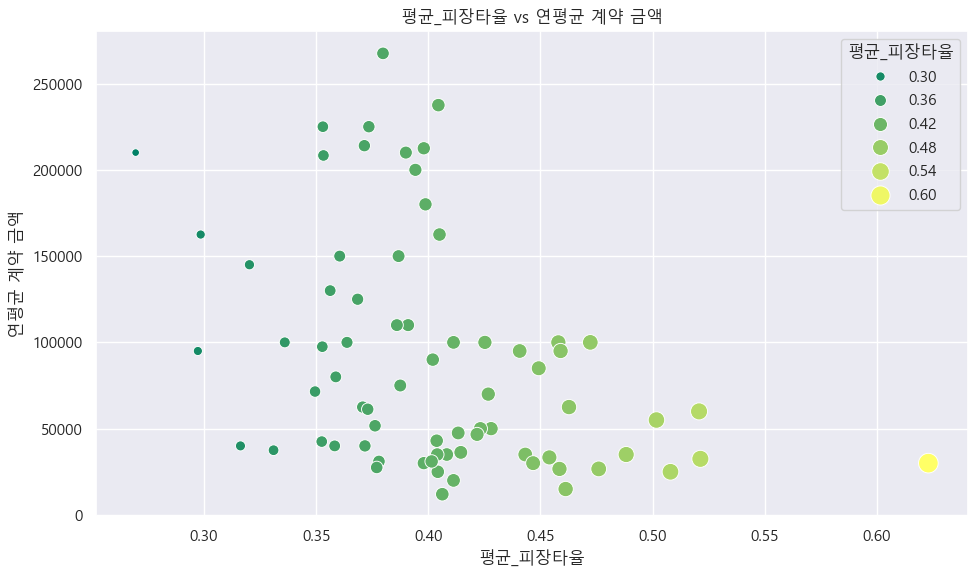

In [74]:
scatter_with_size(merged, 'ÌèâÍ∑†_ÌîºÏû•ÌÉÄÏú®')

- ÎßâÎåÄ

In [76]:
merged['ÌèâÍ∑†_ÌîºÏû•ÌÉÄÏú®'].min()

0.26949999999999996

In [77]:
merged['ÌèâÍ∑†_ÌîºÏû•ÌÉÄÏú®'].max()

0.623

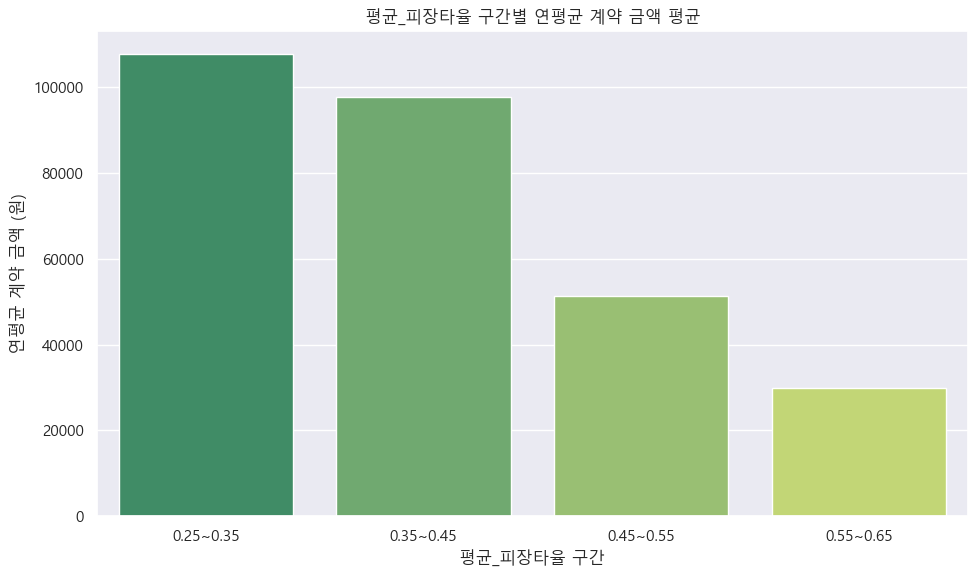

In [78]:
binned_barplot_custom(
    merged,
    x_col='ÌèâÍ∑†_ÌîºÏû•ÌÉÄÏú®',
    bins = [0.25, 0.35, 0.45, 0.55, 0.65],
    labels = ['0.25~0.35','0.35~0.45','0.45~0.55','0.55~0.65']
)

In [79]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
correlation = merged[['ÌèâÍ∑†_ÌîºÏû•ÌÉÄÏú®', 'Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°']].corr().iloc[0, 1]
print(f'üìå ÌèâÍ∑† ÌîºÏû•ÌÉÄÏú®ÏôÄ Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: {correlation:.3f}')

üìå ÌèâÍ∑† ÌîºÏû•ÌÉÄÏú®ÏôÄ Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: -0.390


---

### 7. Î≥ºÎÑ∑ÌóàÏö© vs FA_Ïó∞ÌèâÍ∑†Í≥ÑÏïΩÍ∏à (ÏùòÎØ∏X)

- ÏÇ∞Ï†êÎèÑ

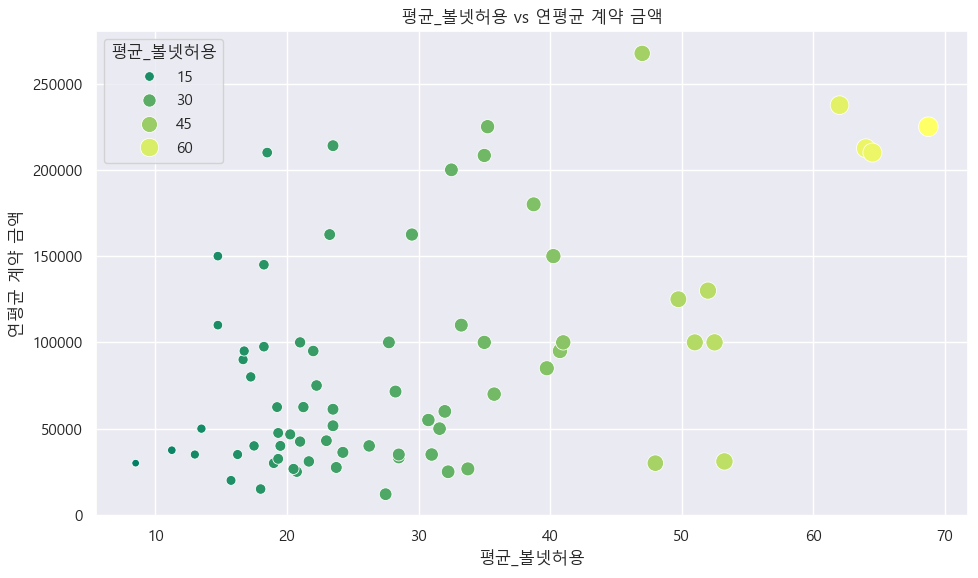

In [83]:
scatter_with_size(merged, 'ÌèâÍ∑†_Î≥ºÎÑ∑ÌóàÏö©')

In [84]:
merged['ÌèâÍ∑†_Î≥ºÎÑ∑ÌóàÏö©'].min()

8.5

In [85]:
merged['ÌèâÍ∑†_Î≥ºÎÑ∑ÌóàÏö©'].max()

68.75

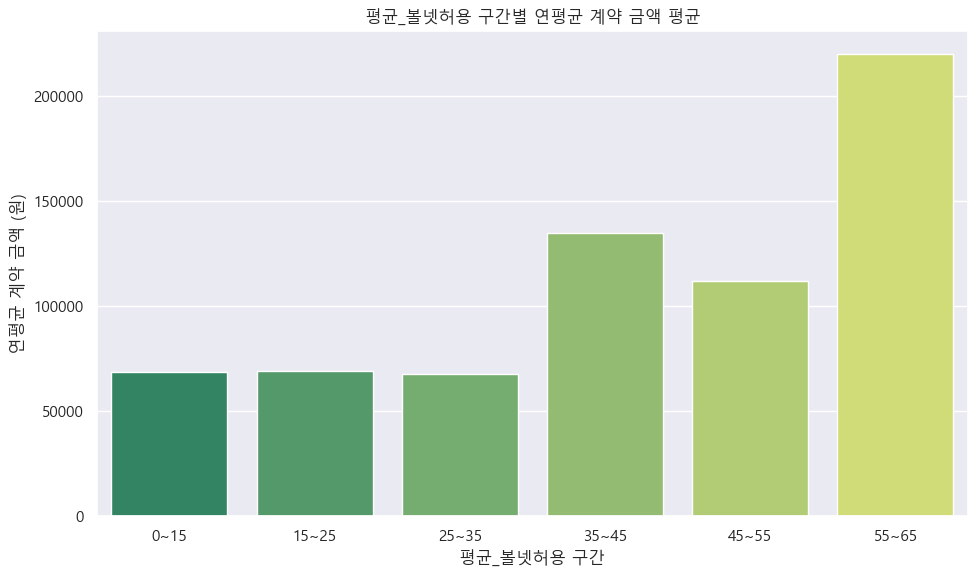

In [86]:
binned_barplot_custom(
    merged,
    x_col='ÌèâÍ∑†_Î≥ºÎÑ∑ÌóàÏö©',
    bins = [0, 15, 25, 35, 45, 55, 65],
    labels = ['0~15','15~25','25~35','35~45','45~55','55~65']
)

In [87]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
correlation = merged[['ÌèâÍ∑†_Î≥ºÎÑ∑ÌóàÏö©', 'Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°']].corr().iloc[0, 1]
print(f'üìå ÌèâÍ∑† Î≥ºÎÑ∑ÌóàÏö©Í≥º Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: {correlation:.3f}')

üìå ÌèâÍ∑† Î≥ºÎÑ∑ÌóàÏö©Í≥º Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.510


---

### 8. Ìà¨Íµ¨Ïàò vs FA_Ïó∞ÌèâÍ∑†Í≥ÑÏïΩÍ∏à (ÎãπÏó∞Ìûà ÏÑ†Î∞úÏù¥ Ìà¨Íµ¨Ïàò ÎßéÏßÄ ÏïäÎÇò..)

- ÏÇ∞Ï†êÎèÑ

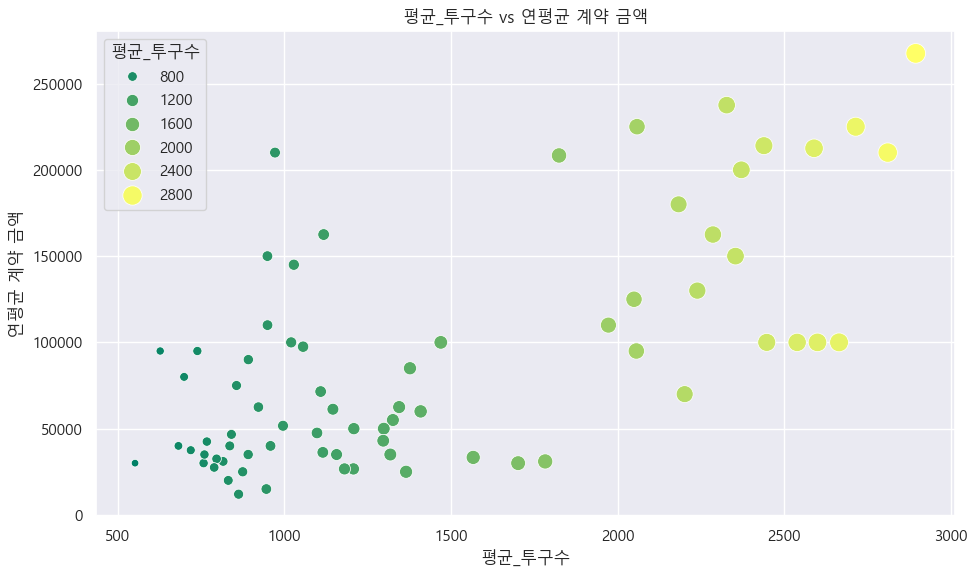

In [91]:
scatter_with_size(merged, 'ÌèâÍ∑†_Ìà¨Íµ¨Ïàò')

- ÎßâÎåÄ

In [93]:
merged['ÌèâÍ∑†_Ìà¨Íµ¨Ïàò'].min()

552.0

In [94]:
merged['ÌèâÍ∑†_Ìà¨Íµ¨Ïàò'].max()

2894.6

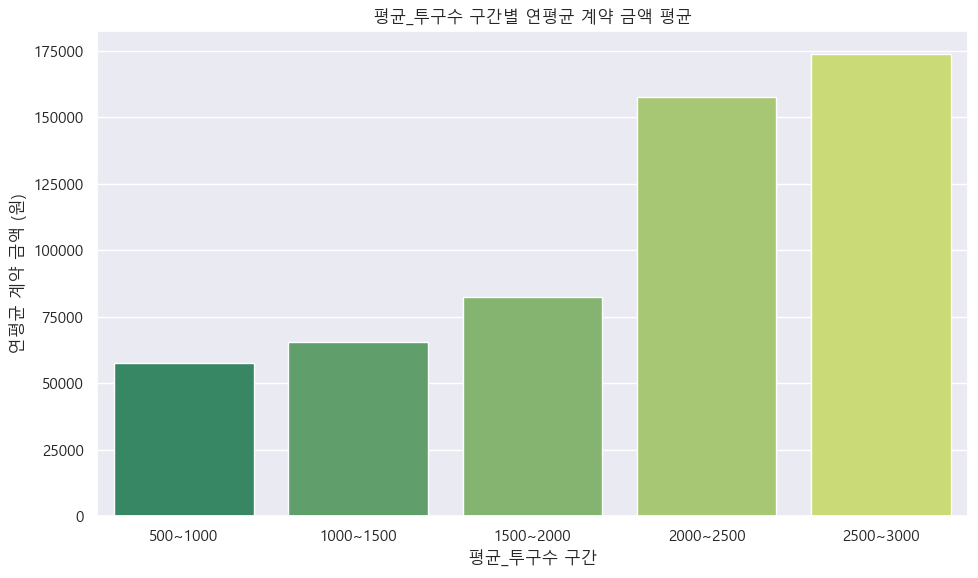

In [95]:
binned_barplot_custom(
    merged,
    x_col='ÌèâÍ∑†_Ìà¨Íµ¨Ïàò',
    bins = [500, 1000, 1500, 2000, 2500, 3000],
    labels = ['500~1000', '1000~1500', '1500~2000', '2000~2500', '2500~3000']
)

In [96]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
correlation = merged[['ÌèâÍ∑†_Ìà¨Íµ¨Ïàò', 'Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°']].corr().iloc[0, 1]
print(f'üìå ÌèâÍ∑† Ìà¨Íµ¨ÏàòÏôÄ Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: {correlation:.3f}')

üìå ÌèâÍ∑† Ìà¨Íµ¨ÏàòÏôÄ Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.671


---

### 9. ÏÇ¨ÏÇ¨Íµ¨ vs FA_Ïó∞ÌèâÍ∑†Í≥ÑÏïΩÍ∏à (Î≥Ñ ÏùòÎØ∏ X)

- ÏÇ∞Ï†êÎèÑ

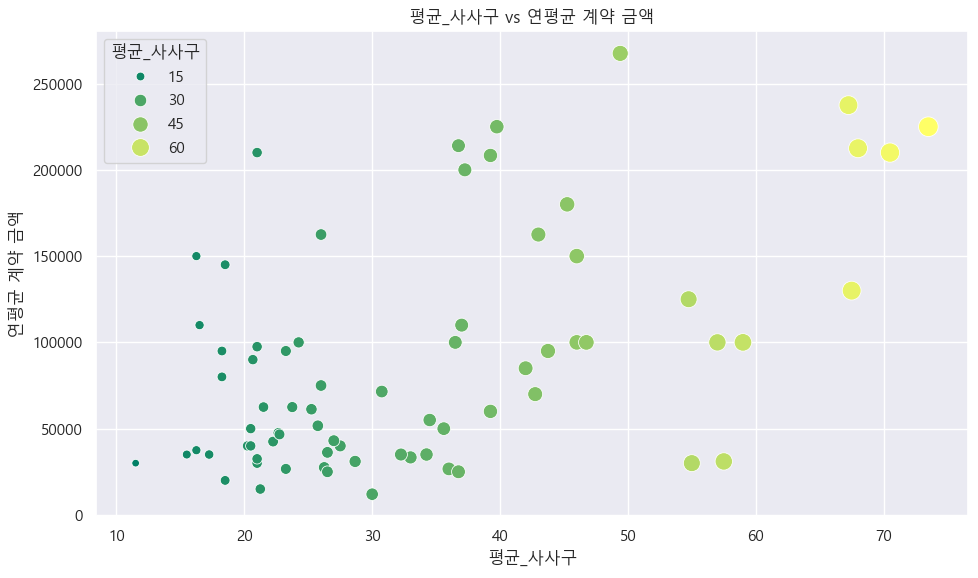

In [100]:
scatter_with_size(merged, 'ÌèâÍ∑†_ÏÇ¨ÏÇ¨Íµ¨')

- ÎßâÎåÄ

In [102]:
merged['ÌèâÍ∑†_ÏÇ¨ÏÇ¨Íµ¨'].min()

11.5

In [103]:
merged['ÌèâÍ∑†_ÏÇ¨ÏÇ¨Íµ¨'].max()

73.5

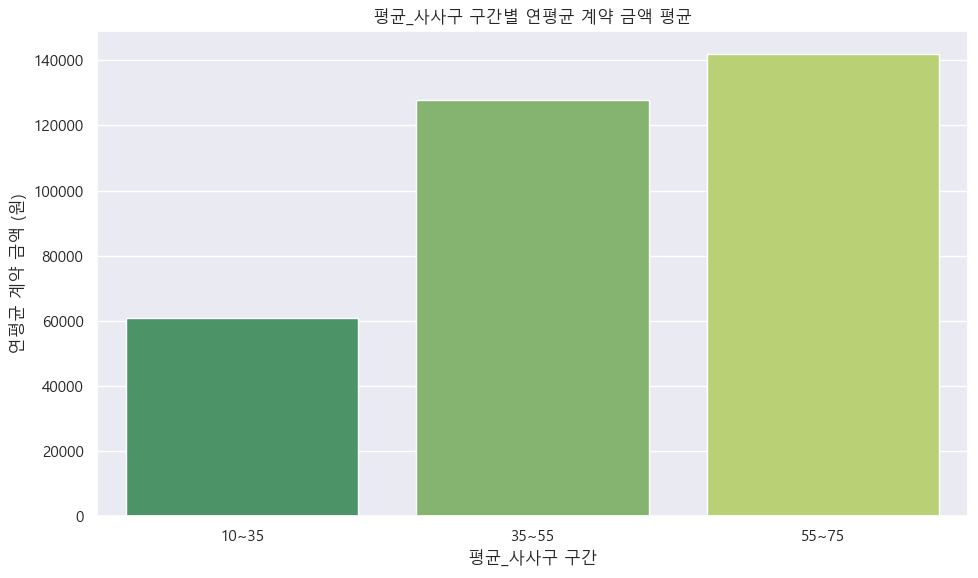

In [104]:
binned_barplot_custom(
    merged,
    x_col='ÌèâÍ∑†_ÏÇ¨ÏÇ¨Íµ¨',
    bins = [10, 35, 55, 75],
    labels = ['10~35', '35~55', '55~75']
)

In [105]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
correlation = merged[['ÌèâÍ∑†_ÏÇ¨ÏÇ¨Íµ¨', 'Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°']].corr().iloc[0, 1]
print(f'üìå ÌèâÍ∑† ÏÇ¨ÏÇ¨Íµ¨ÏôÄ Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: {correlation:.3f}')

üìå ÌèâÍ∑† ÏÇ¨ÏÇ¨Íµ¨ÏôÄ Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.518


---

### 10. Ìà¨ vs FA_Ïó∞ÌèâÍ∑†Í≥ÑÏïΩÍ∏à

- ÎßâÎåÄ

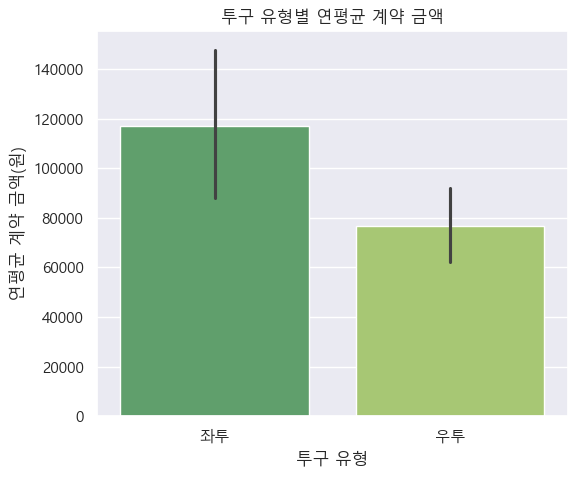

In [109]:
plt.figure(figsize=(6, 5))
sns.barplot(data=merged, x='Ìà¨', y='Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°', hue='Ìà¨', palette='summer')
plt.title('Ìà¨Íµ¨ Ïú†ÌòïÎ≥Ñ Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°')
plt.xlabel('Ìà¨Íµ¨ Ïú†Ìòï')
plt.ylabel('Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°(Ïõê)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [110]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàòÎäî
# ÌûàÌä∏ÎßµÏóê ÏûàÏùå

---

### 11. ÏÑ∏Î∂Ä Ìè¨ÏßÄÏÖò vs FA_Ïó∞ÌèâÍ∑†Í≥ÑÏïΩÍ∏à

- ÎßâÎåÄ

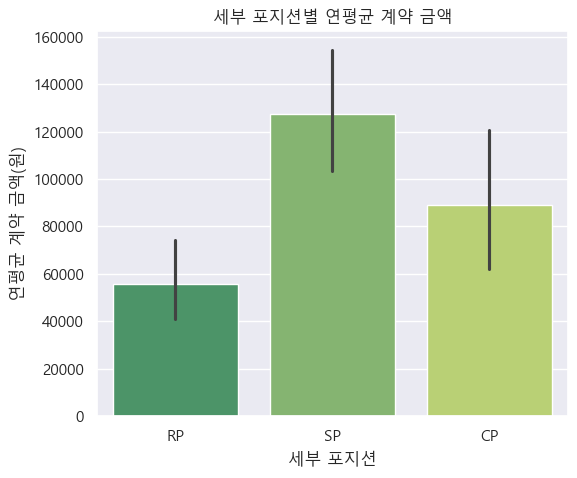

In [114]:
plt.figure(figsize=(6, 5))
sns.barplot(data=merged, x='ÏÑ∏Î∂Ä Ìè¨ÏßÄÏÖò', y='Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°', hue='ÏÑ∏Î∂Ä Ìè¨ÏßÄÏÖò', palette='summer')
plt.title('ÏÑ∏Î∂Ä Ìè¨ÏßÄÏÖòÎ≥Ñ Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°')
plt.xlabel('ÏÑ∏Î∂Ä Ìè¨ÏßÄÏÖò')
plt.ylabel('Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°(Ïõê)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [115]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàòÎäî
# ÌûàÌä∏ÎßµÏóê ÏûàÏùå

---

### 12. ÏõêÌÅ¥ÎüΩÎß®Ïó¨Î∂Ä vs FA_Ïó∞ÌèâÍ∑†Í≥ÑÏïΩÍ∏à

- ÎßâÎåÄ

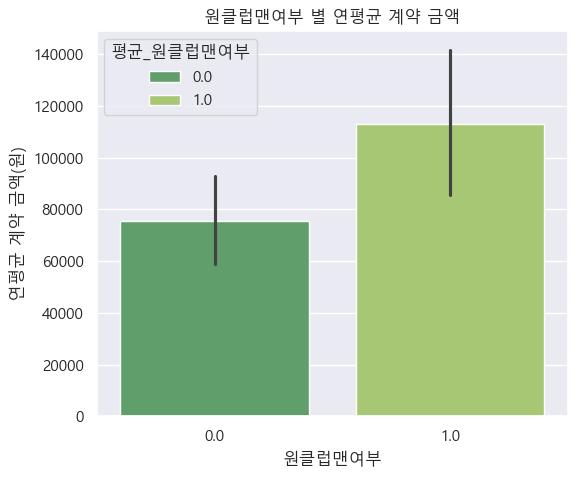

In [119]:
plt.figure(figsize=(6, 5))
sns.barplot(data=merged, x='ÌèâÍ∑†_ÏõêÌÅ¥ÎüΩÎß®Ïó¨Î∂Ä', y='Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°', hue='ÌèâÍ∑†_ÏõêÌÅ¥ÎüΩÎß®Ïó¨Î∂Ä', palette='summer')
plt.title('ÏõêÌÅ¥ÎüΩÎß®Ïó¨Î∂Ä Î≥Ñ Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°')
plt.xlabel('ÏõêÌÅ¥ÎüΩÎß®Ïó¨Î∂Ä')
plt.ylabel('Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°(Ïõê)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [120]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
correlation = merged[['ÌèâÍ∑†_ÏõêÌÅ¥ÎüΩÎß®Ïó¨Î∂Ä', 'Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°']].corr().iloc[0, 1]
print(f'üìå ÏõêÌÅ¥ÎüΩÎß®Ïó¨Î∂ÄÏôÄ Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: {correlation:.3f}')

üìå ÏõêÌÅ¥ÎüΩÎß®Ïó¨Î∂ÄÏôÄ Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.274


---

### Ï∂îÍ∞Ä
- Íµ≠Í∞ÄÎåÄÌëú Í≤ΩÎ†• Ïó¨Î∂Ä
- ÏôÑÌà¨, ÏôÑÎ¥â
- Í≤åÏûÑ, Ïù¥ÎãùÎãπ Ìà¨Íµ¨Ïàò --> ÏùºÎã® Ï†úÏô∏
- ÌååÌÅ¨Ìå©ÌÑ∞ (Ìï¥Ïô∏ Ï†úÏô∏)
- ÌûàÌä∏ÎßµÏùÄ Îß® ÏúÑ ÏΩîÎìúÎ•º ÌÜµÌï¥ Îã§Ïãú Î¥êÏïºÌï®

---

#### Íµ≠ÎåÄÏ∂úÏ†ÑÏó¨Î∂Ä

In [125]:
# ÏÑ†ÏàòÎ≥Ñ Íµ≠Í∞ÄÎåÄÌëú ÌèâÍ∑† Í≥ÑÏÇ∞
national_team = df1.groupby('ÏÑ†ÏàòÎ™Ö')['Íµ≠ÎåÄÏ∂úÏ†ÑÌöüÏàò'].mean().reset_index()

# Ï°∞Í±¥Ïóê Îî∞Îùº 1 ÎòêÎäî 0ÏúºÎ°ú Î≥ÄÌôò
national_team['Íµ≠ÎåÄÏ∂úÏ†ÑÏó¨Î∂Ä'] = national_team['Íµ≠ÎåÄÏ∂úÏ†ÑÌöüÏàò'].apply(lambda x: 1 if x > 0 else 0)

# ÌïÑÏöîÌïú Ïª¨ÎüºÎßå Ï†ïÎ¶¨
national_team = national_team[['ÏÑ†ÏàòÎ™Ö', 'Íµ≠ÎåÄÏ∂úÏ†ÑÏó¨Î∂Ä']]

In [126]:
merged = merged.merge(national_team, on='ÏÑ†ÏàòÎ™Ö', how='left')

#### ÏôÑÌà¨, ÏôÑÎ¥â (Ïó¨Î∂Ä)

In [128]:
# ÏÑ†ÏàòÎ≥Ñ ÏôÑÌà¨ / ÏôÑÎ¥â Ìï©Í≥Ñ
complete_stats = df1.groupby('ÏÑ†ÏàòÎ™Ö')[['ÏôÑÌà¨', 'ÏôÑÎ¥â']].sum().reset_index()

# Í≤ΩÌóò Ïó¨Î∂Ä Ïª¨Îüº Ï∂îÍ∞Ä
complete_stats['ÏôÑÌà¨_Ïó¨Î∂Ä'] = complete_stats['ÏôÑÌà¨'].apply(lambda x: 1 if x > 0 else 0)
complete_stats['ÏôÑÎ¥â_Ïó¨Î∂Ä'] = complete_stats['ÏôÑÎ¥â'].apply(lambda x: 1 if x > 0 else 0)

# ÌïÑÏöî Ïª¨ÎüºÎßå ÏÑ†ÌÉù
complete_flags = complete_stats[['ÏÑ†ÏàòÎ™Ö', 'ÏôÑÌà¨_Ïó¨Î∂Ä', 'ÏôÑÎ¥â_Ïó¨Î∂Ä']]

In [129]:
merged = merged.merge(complete_flags, on='ÏÑ†ÏàòÎ™Ö', how='left')

#### ÌååÌÅ¨Ìå©ÌÑ∞

In [131]:
# ÏÑ†ÏàòÎ≥Ñ ÌôàÎü∞ ÌååÌÅ¨Ìå©ÌÑ∞ ÌèâÍ∑† (df_cleanedÏóêÏÑú)
hr_park = df_cleaned.groupby('ÏÑ†ÏàòÎ™Ö')['ÌôàÎü∞ÌååÌÅ¨Ìå©ÌÑ∞'].mean().reset_index()

In [132]:
merged = merged.merge(hr_park, on='ÏÑ†ÏàòÎ™Ö', how='left')

---

### 13. Íµ≠ÎåÄÏ∂úÏ†ÑÏó¨Î∂Ä vs FA_Ïó∞ÌèâÍ∑†Í≥ÑÏïΩÍ∏à

- ÎßâÎåÄ

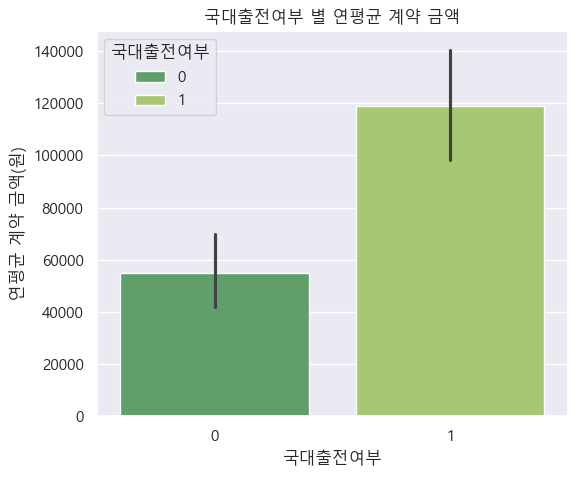

In [136]:
plt.figure(figsize=(6, 5))
sns.barplot(data=merged, x='Íµ≠ÎåÄÏ∂úÏ†ÑÏó¨Î∂Ä', y='Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°', hue='Íµ≠ÎåÄÏ∂úÏ†ÑÏó¨Î∂Ä', palette='summer')
plt.title('Íµ≠ÎåÄÏ∂úÏ†ÑÏó¨Î∂Ä Î≥Ñ Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°')
plt.xlabel('Íµ≠ÎåÄÏ∂úÏ†ÑÏó¨Î∂Ä')
plt.ylabel('Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°(Ïõê)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [137]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
correlation = merged[['Íµ≠ÎåÄÏ∂úÏ†ÑÏó¨Î∂Ä', 'Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°']].corr().iloc[0, 1]
print(f'üìå Íµ≠ÎåÄÏ∂úÏ†ÑÏó¨Î∂ÄÏôÄ Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: {correlation:.3f}')

üìå Íµ≠ÎåÄÏ∂úÏ†ÑÏó¨Î∂ÄÏôÄ Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.484


---

### 14. ÏôÑÌà¨/ÏôÑÎ¥â vs FA_Ïó∞ÌèâÍ∑†Í≥ÑÏïΩÍ∏à

- ÎßâÎåÄ

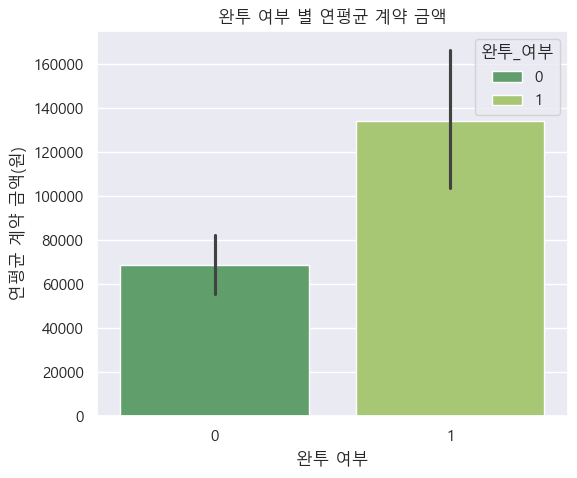

In [141]:
plt.figure(figsize=(6, 5))
sns.barplot(data=merged, x='ÏôÑÌà¨_Ïó¨Î∂Ä', y='Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°', hue='ÏôÑÌà¨_Ïó¨Î∂Ä', palette='summer')
plt.title('ÏôÑÌà¨ Ïó¨Î∂Ä Î≥Ñ Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°')
plt.xlabel('ÏôÑÌà¨ Ïó¨Î∂Ä')
plt.ylabel('Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°(Ïõê)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

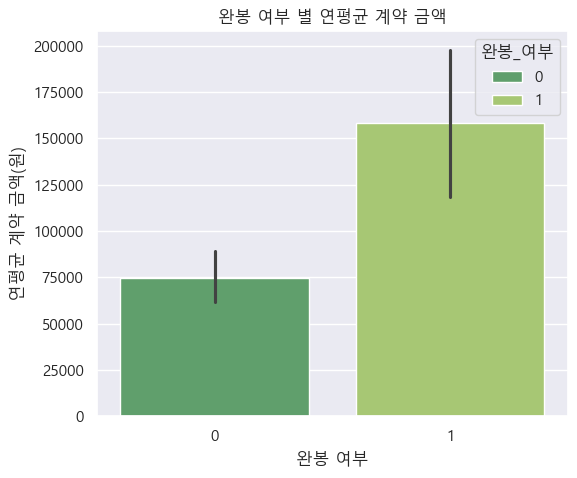

In [142]:
plt.figure(figsize=(6, 5))
sns.barplot(data=merged, x='ÏôÑÎ¥â_Ïó¨Î∂Ä', y='Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°', hue='ÏôÑÎ¥â_Ïó¨Î∂Ä', palette='summer')
plt.title('ÏôÑÎ¥â Ïó¨Î∂Ä Î≥Ñ Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°')
plt.xlabel('ÏôÑÎ¥â Ïó¨Î∂Ä')
plt.ylabel('Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°(Ïõê)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [143]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
correlation = merged[['ÏôÑÌà¨_Ïó¨Î∂Ä', 'Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°']].corr().iloc[0, 1]
print(f'üìå ÏôÑÌà¨_Ïó¨Î∂ÄÏôÄ Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: {correlation:.3f}')

üìå ÏôÑÌà¨_Ïó¨Î∂ÄÏôÄ Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.463


In [144]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
correlation = merged[['ÏôÑÎ¥â_Ïó¨Î∂Ä', 'Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°']].corr().iloc[0, 1]
print(f'üìå ÏôÑÎ¥â_Ïó¨Î∂ÄÏôÄ Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: {correlation:.3f}')

üìå ÏôÑÎ¥â_Ïó¨Î∂ÄÏôÄ Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.487


---

### 15. ÌôàÎü∞ÌååÌÅ¨Ìå©ÌÑ∞ vs FA_Ïó∞ÌèâÍ∑†Í≥ÑÏïΩÍ∏à

- ÏÇ∞Ï†êÎèÑ

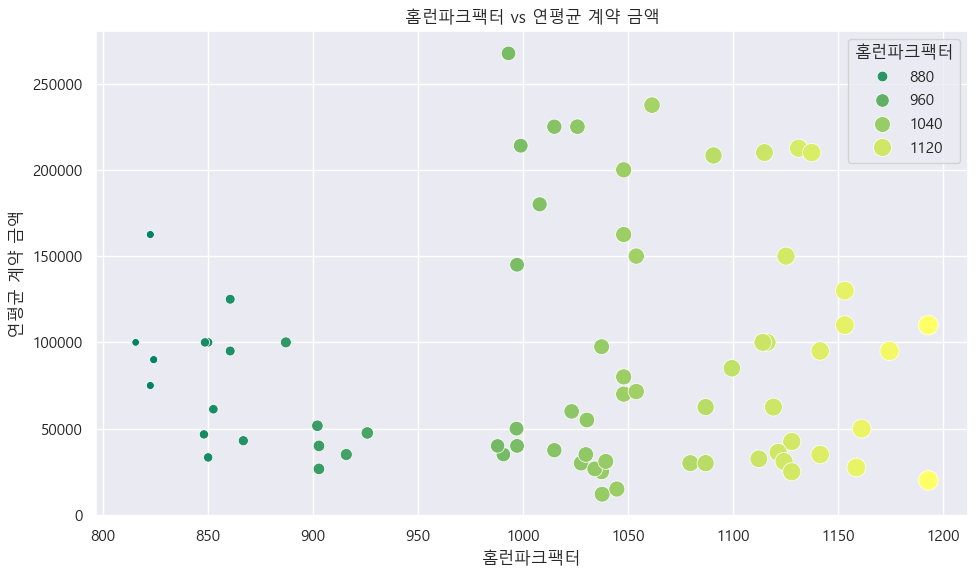

In [148]:
scatter_with_size(merged, 'ÌôàÎü∞ÌååÌÅ¨Ìå©ÌÑ∞')

- ÎßâÎåÄ

In [150]:
merged['ÌôàÎü∞ÌååÌÅ¨Ìå©ÌÑ∞'].min()

815.75

In [151]:
merged['ÌôàÎü∞ÌååÌÅ¨Ìå©ÌÑ∞'].max()

1193.0

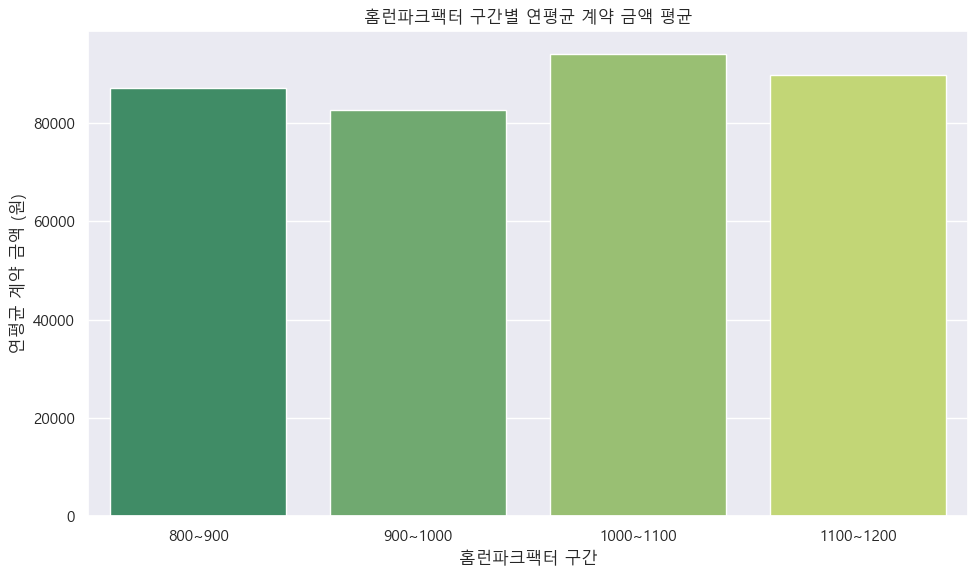

In [152]:
binned_barplot_custom(
    merged,
    x_col='ÌôàÎü∞ÌååÌÅ¨Ìå©ÌÑ∞',
    bins = [800, 900, 1000, 1100, 1200],
    labels = ['800~900', '900~1000', '1000~1100', '1100~1200']
)

In [153]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
correlation = merged[['ÌôàÎü∞ÌååÌÅ¨Ìå©ÌÑ∞', 'Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°']].corr().iloc[0, 1]
print(f'üìå ÌôàÎü∞ÌååÌÅ¨Ìå©ÌÑ∞ÏôÄ Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: {correlation:.3f}')

üìå ÌôàÎü∞ÌååÌÅ¨Ìå©ÌÑ∞ÏôÄ Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.052


---

## 16. WHIP

- ÏÇ∞Ï†êÎèÑ

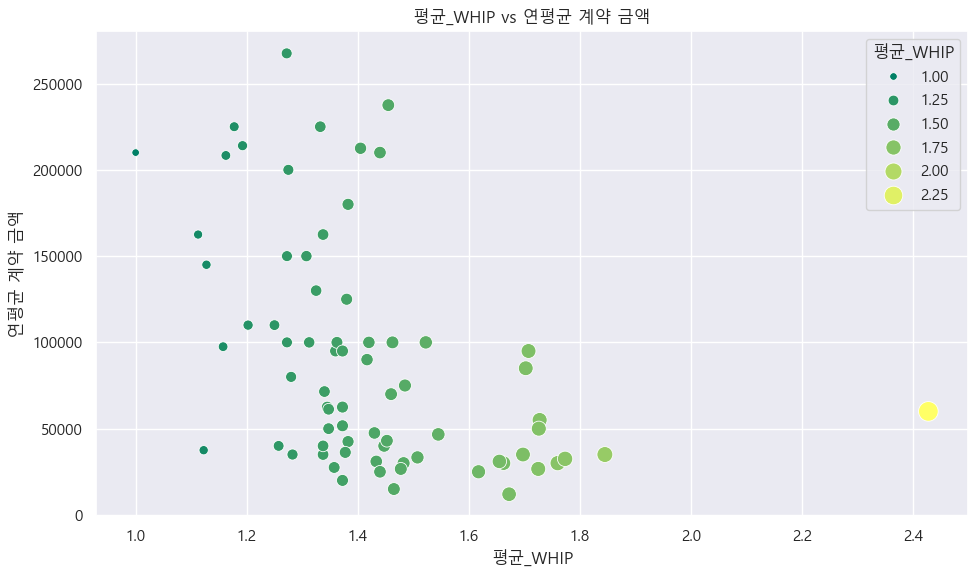

In [157]:
scatter_with_size(merged, 'ÌèâÍ∑†_WHIP')

In [158]:
merged['ÌèâÍ∑†_WHIP'].min()

1.0

In [159]:
merged['ÌèâÍ∑†_WHIP'].max()

2.4275

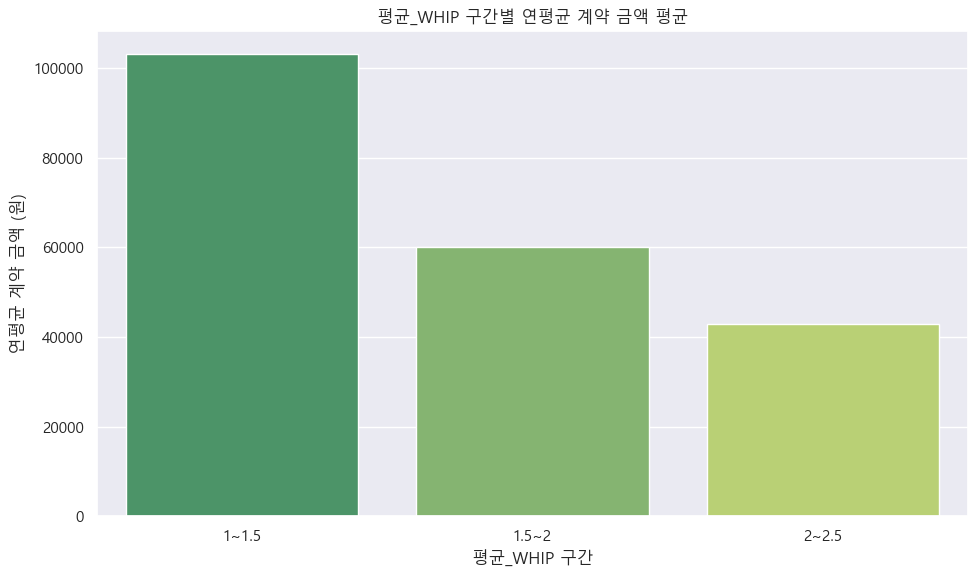

In [160]:
binned_barplot_custom(
    merged,
    x_col='ÌèâÍ∑†_WHIP',
    bins = [1, 1.5, 1.6, 2.5],
    labels = ['1~1.5', '1.5~2', '2~2.5']
)

In [161]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
correlation = merged[['ÌèâÍ∑†_WHIP', 'Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°']].corr().iloc[0, 1]
print(f'üìå WHIPÏôÄ Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: {correlation:.3f}')

üìå WHIPÏôÄ Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: -0.443


---

## Ï∂îÍ∞Ä1. ERA*

- ÏÇ∞Ï†êÎèÑ

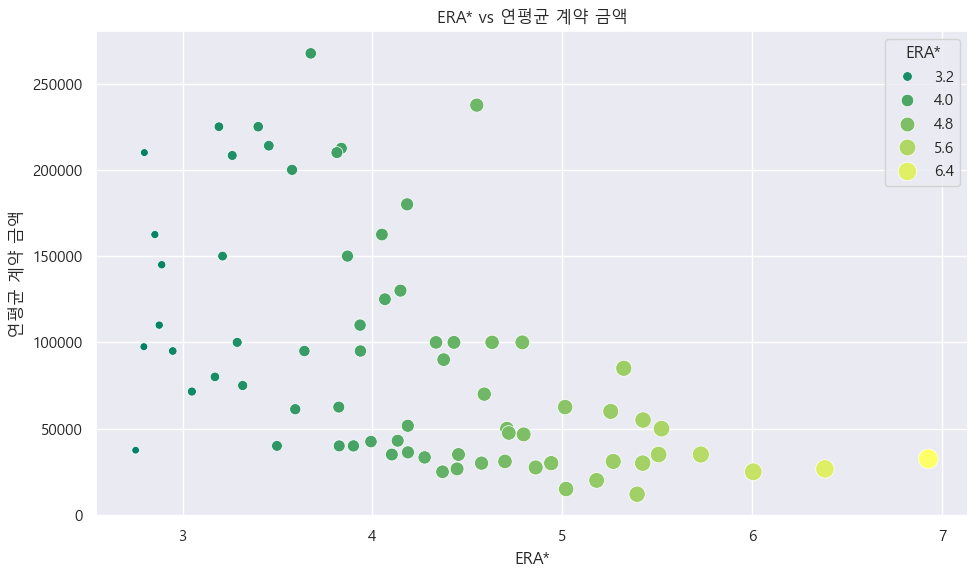

In [200]:
scatter_with_size(merged, 'ERA*')

- ÎßâÎåÄ

In [191]:
merged['ERA*'].min()

2.7522935779816518

In [193]:
merged['ERA*'].max()

6.928301886792453

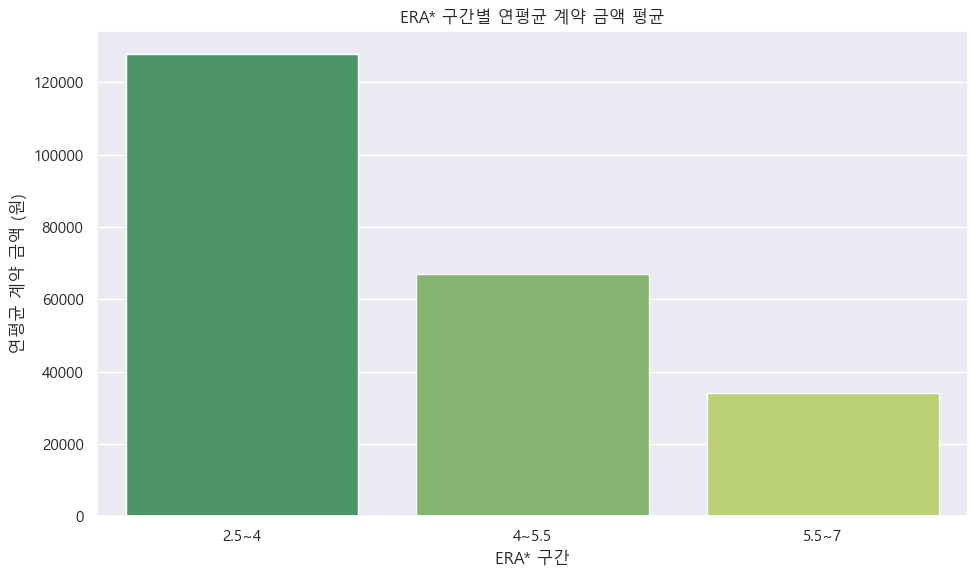

In [207]:
binned_barplot_custom(
    merged,
    x_col='ERA*',
    bins = [2.5, 4, 5.5, 7],
    labels = ['2.5~4', '4~5.5', '5.5~7']
)

In [220]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
correlation = merged[['ERA*', 'Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°']].corr().iloc[0, 1]
print(f'üìå ERA*Í≥º Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: {correlation:.3f}')

üìå ERA*Í≥º Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: -0.521


## Ï∂îÍ∞Ä2. K/9

- ÏÇ∞Ï†êÎèÑ

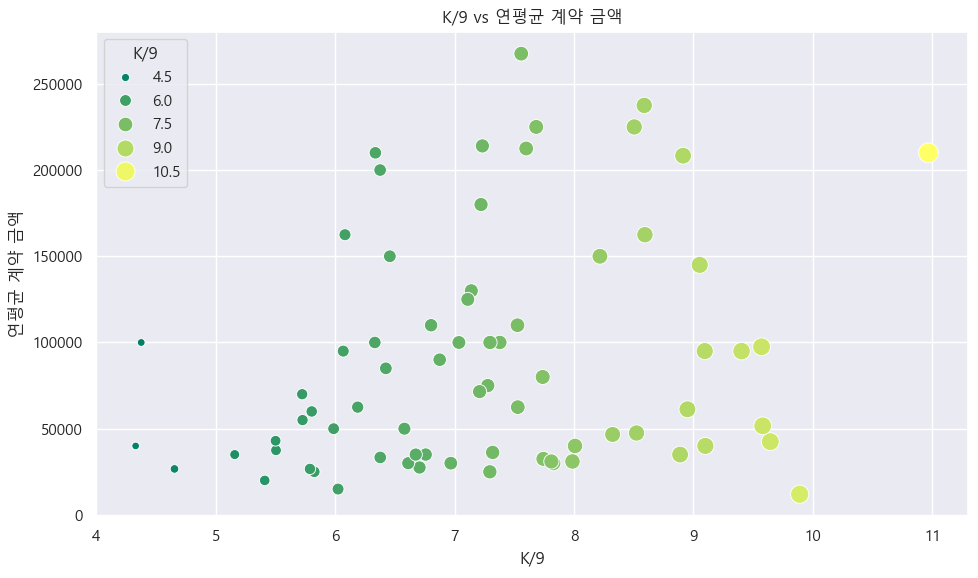

In [213]:
scatter_with_size(merged, 'K/9')

- ÎßâÎåÄ

In [216]:
merged['K/9'].min()

4.329324699352451

In [218]:
merged['K/9'].max()

10.966386554621847

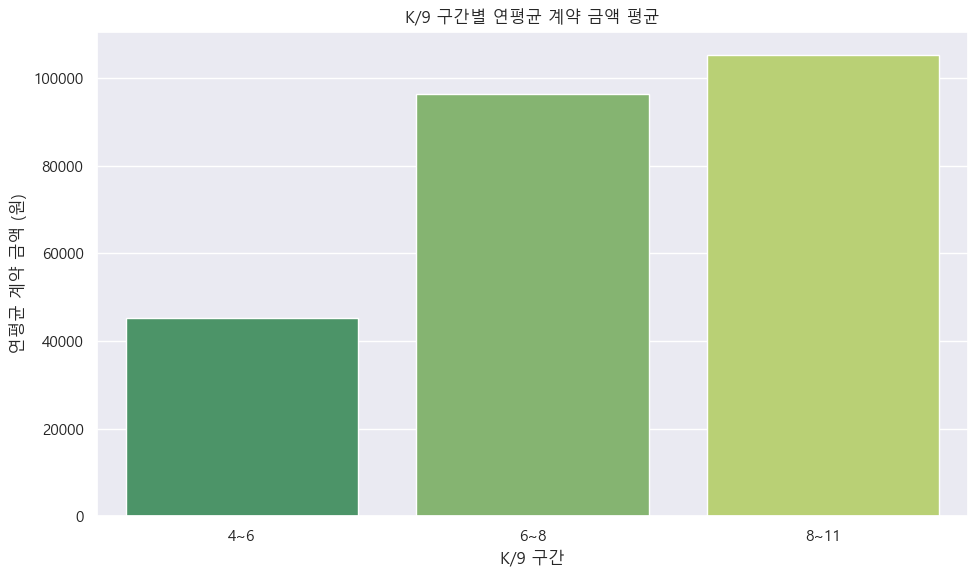

In [244]:
binned_barplot_custom(
    merged,
    x_col='K/9',
    bins = [4, 6, 8, 11],
    labels = ['4~6', '6~8', '8~11']
)

In [224]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
correlation = merged[['K/9', 'Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°']].corr().iloc[0, 1]
print(f'üìå K/9ÏôÄ Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: {correlation:.3f}')

üìå K/9ÏôÄ Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.241


## Ï∂îÍ∞Ä3. BB/9

- ÏÇ∞Ï†êÎèÑ

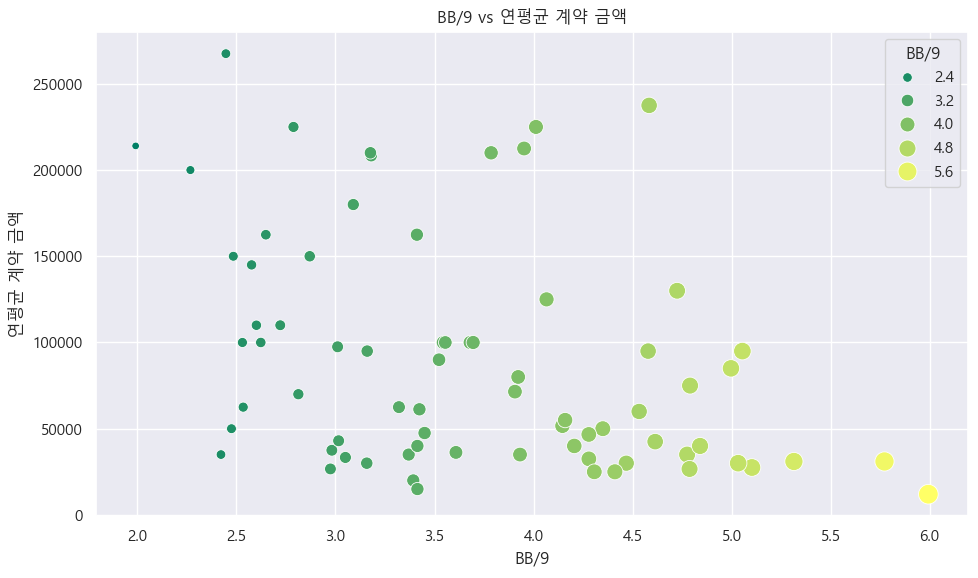

In [229]:
scatter_with_size(merged, 'BB/9')

- ÎßâÎåÄ

In [232]:
merged['BB/9'].min()

1.9909706546275396

In [236]:
merged['BB/9'].max()

5.993340732519423

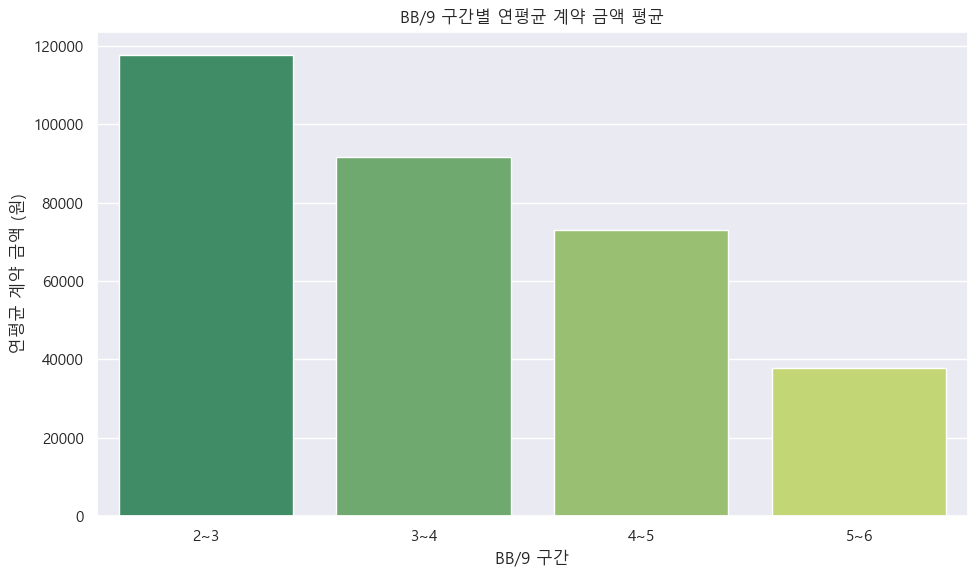

In [238]:
binned_barplot_custom(
    merged,
    x_col='BB/9',
    bins = [2, 3, 4, 5, 6],
    labels = ['2~3', '3~4', '4~5', '5~6']
)

In [240]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
correlation = merged[['BB/9', 'Ïó∞ÌèâÍ∑† Í≥ÑÏïΩ Í∏àÏï°']].corr().iloc[0, 1]
print(f'üìå BB/9ÏôÄ Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: {correlation:.3f}')

üìå BB/9ÏôÄ Í≥ÑÏïΩ Ï¥ùÏï°Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: -0.383
